In [117]:
using LightGraphs
using GraphPlot
using Random

# N = 100
# K = 5

# G1 = random_regular_graph(N, K)

# gplot(G1, nodelabel=1:N)


In [4]:
using StatsBase
using LightGraphs
using GraphPlot
using Random

function nearestNeighborsExclusive(G,i)
    ns = neighbors(G, i)
    seconds = Set()
    
    for j in ns
        for k in neighbors(G,j)
            push!(seconds, k)
        end
    end
    toSubtract = Set(vcat(ns, [i]))
    return collect(setdiff(seconds, toSubtract))
end
    
            
# println(nearestNeighborsExclusive(G1,6))
    

function findPrefTarget(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    if length(nnes) == 0
        return 0
    else
#         println("In findPrefTarget with length $(length(nnes))")
        newAttach = sample(nnes, AnalyticWeights([agentScores[i] for i in nnes]))
        return newAttach
    end
end
# println(neighbors(G1, 1))
function prefAttach(G,i,agentScores)
    
    new = findPrefTarget(G,i,agentScores)
    if new == 0
        return
    end
    
    toSubtract = rand(neighbors(G,i),1)[1]
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end
    
# prefAttach(G1,1)
# println(neighbors(G1,1))
    

prefAttach (generic function with 1 method)

# Attachment Model Code

In [5]:
using StatsBase
using LightGraphs
using GraphPlot
using Random

function nearestNeighborsExclusive(G,i)
    ns = neighbors(G, i)
    seconds = Set()
    
    for j in ns
        for k in neighbors(G,j)
            push!(seconds, k)
        end
    end
    toSubtract = Set(vcat(ns, [i]))
    return collect(setdiff(seconds, toSubtract))
end
    
            
# println(nearestNeighborsExclusive(G1,6))
    

function findPrefTarget1(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    if length(nnes) == 0
        return 0
    else
#         println("In findPrefTarget with length $(length(nnes))")
        newAttach = sample(nnes, AnalyticWeights([agentScores[i] for i in nnes]))
        return newAttach
    end
end

function averageNeighborValues(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    if length(nnes) == 0
        return 0
    end
    
    return mean([agentScores[j] for j in neighbors(G,i)])
end

function averageInNeighborValues(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    if length(nnes) == 0
        return 0
    end
    
    return mean([agentScores[j] for j in inneighbors(G,i)])
end

function findPrefTarget2(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    
    if length(nnes) == 0
        return 0
    end
    
    neighborScores = [averageNeighborValues(G,j,agentScores) for j in nnes]
    
    newAttach = sample(nnes, AnalyticWeights(neighborScores))
    return newAttach
end

function softmax(array)
    arrayExponentials = [exp(i) for i in array]
    return arrayExponentials ./ sum(arrayExponentials)
end

function findPrefTarget2Softmax(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    
    if length(nnes) == 0
        return 0
    end
    
    newAttach = sample(nnes, AnalyticWeights(softmax([averageNeighborValues(G,j,agentScores) for j in nnes])))
    return newAttach
    
end

function findPrefTarget2Directed(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    
    if length(nnes) == 0
        return 0
    end
    
    newAttach = sample(nnes, AnalyticWeights([averageInNeighborValues(G,j,agentScores) for j in nnes]))
    return newAttach
    
end
    
    
    
# println(neighbors(G1, 1))

#personal value as exterior value
function prefAttach1!(G,i,agentScores)
    
    new = findPrefTarget1(G,i,agentScores)
    if new == 0
        return
    end
    
    toSubtract = sample(neighbors(G,i), AnalyticWeights([1-agentScores[j] for j in neighbors(G,i)]))
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end

#exterior value as averaged personal value of neighbors
function prefAttach2!(G,i,agentScores)
    new = findPrefTarget2(G,i,agentScores)
    if new == 0
        return
    end
    
    toSubtract = sample(neighbors(G,i), AnalyticWeights([1-averageNeighborValues(G,j,agentScores) for j in neighbors(G,i)]))
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end

function prefAttach2Directed!(G,i,agentScores)
    new = findPrefTarget2Directed(G,i,agentScores)
    if new == 0
        return
    end
    
    toSubtract = sample(neighbors(G,i), AnalyticWeights([1-averageInNeighborValues(G,j,agentScores) for j in neighbors(G,i)]))
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end

function prefAttach2Softmax!(G,i,agentScores)
    new = findPrefTarget2Softmax(G,i,agentScores)
    if new == 0
        return
    end
    
    toSubtract = sample(neighbors(G,i), AnalyticWeights(softmax([1-averageNeighborValues(G,j,agentScores) for j in neighbors(G,i)])))
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end


    
    

prefAttach2Softmax! (generic function with 1 method)

# Plotting code

In [6]:
using Plots

function generalStatPlot(G, agentScores)
    N = length(agentScores)
    pairs = Iterators.flatten([[(agentScores[i],agentScores[j]) for j in neighbors(G,i)] for i in 1:N])
    myplot = histogram2d([pair[1] for pair in pairs], [pair[2] for pair in pairs], nbins = 25, title="Connection values vs value")
    myotherplot = histogram2d(agentScores, [zeromean([agentScores[j] for j in neighbors(G,i)]) for i in 1:N], nbins=20, title="Average connection values vs value")
    mythirdplot = histogram2d(agentScores, [length(neighbors(G,i)) for i in 1:N], nbins = 25, title="Num connections vs value")
    myfourthplot = histogram([length(neighbors(G,j)) for j in 1:N], title= "Degree distribution")
    return plot(myplot, myotherplot, mythirdplot, myfourthplot)
end
    

generalStatPlot (generic function with 1 method)

# Preferential Attachment Model Type 1 (Interior is Exterior)

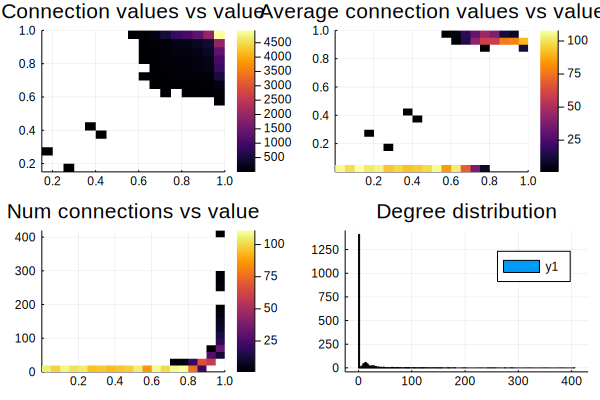

In [7]:
function zeromean(x)
    if length(x) == 0
        return 0.0
    else
        return mean(x)
    end
end

using Plots
theplot = Nothing

for K in [10]
    N = 2000
#     K = 5
    numRounds = 1000000

    G1 = random_regular_graph(N, K)
    agentScores = rand(N)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttach1!(G1,activeNode, agentScores)
    #     println("$n complete")
    end
    theplot = generalStatPlot(G1,agentScores)
end
plot(theplot)


# #Type 1 digraph

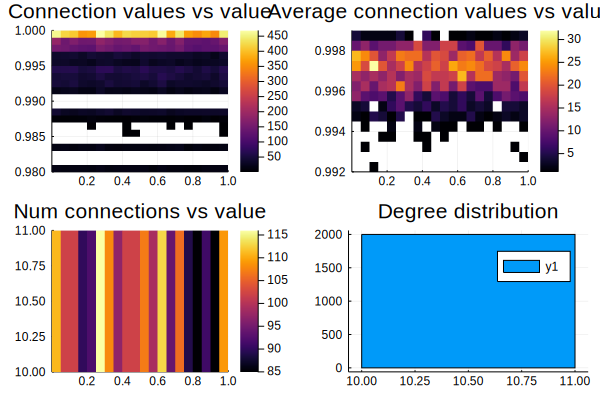

In [52]:
function zeromean(x)
    if length(x) == 0
        return 0.0
    else
        return mean(x)
    end
end

using Plots
myplot = Nothing
myotherplot = Nothing
mythirdplot = Nothing
myfourthplot = Nothing




for K in [10]
    N = 2000
#     K = 5
    numRounds = 200000

    G1 = random_regular_digraph(N, K)
    agentScores = rand(N)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttach1!(G1,activeNode, agentScores)
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    pairs = Iterators.flatten([[(agentScores[i],agentScores[j]) for j in neighbors(G1,i)] for i in 1:N])
    myplot = histogram2d([pair[1] for pair in pairs], [pair[2] for pair in pairs], nbins = 25, title="Connection values vs value")
    myotherplot = histogram2d(agentScores, [zeromean([agentScores[j] for j in neighbors(G1,i)]) for i in 1:N], nbins=20, title="Average connection values vs value")
    mythirdplot = histogram2d(agentScores, [length(neighbors(G1,i)) for i in 1:N], nbins = 25, title="Num connections vs value")
    myfourthplot = histogram([length(neighbors(G1,j)) for j in 1:N], title= "Degree distribution")
end
plot(myplot, myotherplot, mythirdplot, myfourthplot)

Determining rich club behaviors
Vertex 20 has indegree 78
Vertex 20 outneighbors are [40, 53, 56, 62, 88]
Vertex 40 has indegree 78
Vertex 40 outneighbors are [20, 53, 56, 62, 88]
Vertex 53 has indegree 87
Vertex 53 outneighbors are [20, 40, 56, 62, 88]
Vertex 56 has indegree 91
Vertex 56 outneighbors are [20, 40, 53, 62, 88]
Vertex 62 has indegree 85
Vertex 62 outneighbors are [20, 40, 53, 56, 88]
Vertex 88 has indegree 81
Vertex 88 outneighbors are [20, 40, 53, 56, 62]


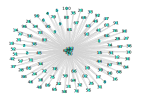

In [11]:
myN = 100
myK = 5

myG = random_regular_digraph(myN, myK)
myAgentscores = rand(myN)
myNumRounds = 2000000

for n in 1:myNumRounds
    activeNode = rand(1:myN,1)[1]
    prefAttach1!(myG,activeNode, myAgentscores)
#     println("$n complete")
end

println("Determining rich club behaviors")
for v in 1:myN
    if indegree(myG, v) > 0
        println("Vertex $v has indegree $(indegree(myG,v))")
        println("Vertex $v outneighbors are $(outneighbors(myG, v))")
    end
end

gplot(myG, nodelabel=1:myN)

[47, 66, 43, 83, 24, 44]


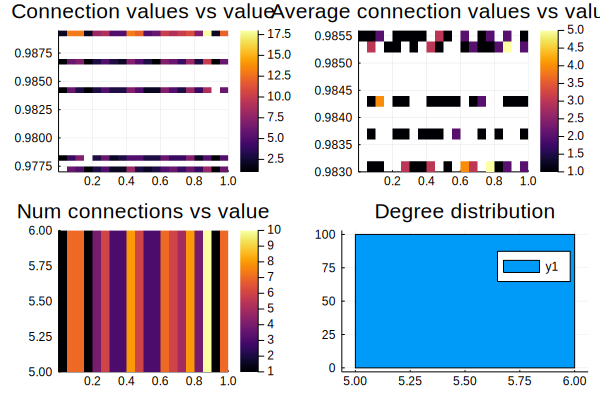

In [84]:
println(partialsortperm(myAgentscores, 1:6,rev=true))
plot(generalStatPlot(myG, myAgentscores))

# Preferential Attachment Type 2 (exterior is average neighbor personal)

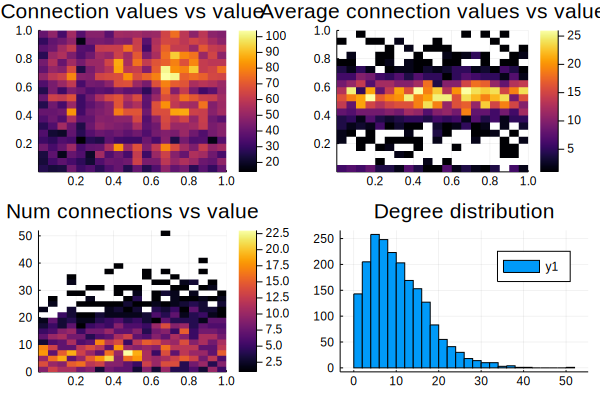

In [10]:
function zeromean(x)
    if length(x) == 0
        return 0.0
    else
        return mean(x)
    end
end

using Plots
myplot = Nothing
myotherplot = Nothing
mythirdplot = Nothing
myfourthplot = Nothing




for K in [10]
    N = 2000
#     K = 5
    numRounds = 50000

    G1 = random_regular_graph(N, K)
    agentScores = rand(N)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttach2!(G1,activeNode, agentScores)
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    pairs = Iterators.flatten([[(agentScores[i],agentScores[j]) for j in neighbors(G1,i)] for i in 1:N])
    myplot = histogram2d([pair[1] for pair in pairs], [pair[2] for pair in pairs], nbins = 25, title="Connection values vs value")
    myotherplot = histogram2d(agentScores, [zeromean([agentScores[j] for j in neighbors(G1,i)]) for i in 1:N], nbins=20, title="Average connection values vs value")
    mythirdplot = histogram2d(agentScores, [length(neighbors(G1,i)) for i in 1:N], nbins = 25, title="Num connections vs value")
    myfourthplot = histogram([length(neighbors(G1,j)) for j in 1:N], title= "Degree distribution")
end
plot(myplot, myotherplot, mythirdplot, myfourthplot)

# Preferential Attachment Model Type 2 (Exterior is average of neighbor interior)

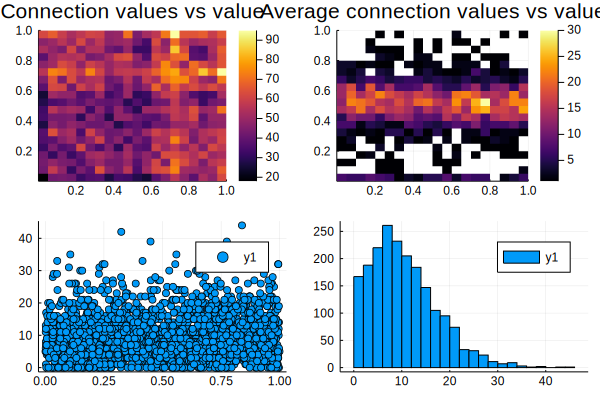

In [37]:
function zeromean(x)
    if length(x) == 0
        return 0.0
    else
        return mean(x)
    end
end

using Plots
myplot = Nothing
myotherplot = Nothing
mythirdplot = Nothing
myfourthplot = Nothing




for K in [10]
    N = 2000
#     K = 5
    numRounds = 60000

    G1 = random_regular_graph(N, K)
    agentScores = rand(N)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttach2Softmax!(G1,activeNode, agentScores)
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    pairs = Iterators.flatten([[(agentScores[i],agentScores[j]) for j in neighbors(G1,i)] for i in 1:N])
    myplot = histogram2d([pair[1] for pair in pairs], [pair[2] for pair in pairs], nbins = 25, title="Connection values vs value")
    myotherplot = histogram2d(agentScores, [zeromean([agentScores[j] for j in neighbors(G1,i)]) for i in 1:N], nbins=20, title="Average connection values vs value")
    mythirdplot = histogram2d(agentScores, [length(neighbors(G1,i)) for i in 1:N], nbins = 25, title="Num connections vs value")
    myfourthplot = histogram([length(neighbors(G1,j)) for j in 1:N], title= "Degree distribution")
end
plot(myplot, myotherplot, mythirdplot, myfourthplot)

# Preferential Attachment Model Types 2 Digraph

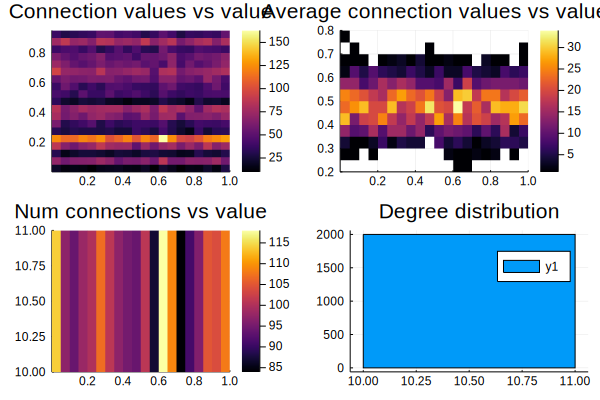

In [90]:
function zeromean(x)
    if length(x) == 0
        return 0.0
    else
        return mean(x)
    end
end

using Plots
theplot = Nothing


for K in [10]
    N = 2000
#     K = 5
    numRounds = 1000000

    G1 = random_regular_digraph(N, K)
    agentScores = rand(N)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttach2Directed!(G1,activeNode, agentScores)
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    theplot = generalStatPlot(G1, agentScores)   
end
plot(theplot)

# Preferential Attachment code for strategic networks

In [8]:
using StatsBase
using LightGraphs
using GraphPlot
using Random

function nearestNeighborsExclusive(G,i)
    ns = neighbors(G, i)
    seconds = Set()
    
    for j in ns
        for k in neighbors(G,j)
            push!(seconds, k)
        end
    end
    toSubtract = Set(vcat(ns, [i]))
    return collect(setdiff(seconds, toSubtract))
end

function nearestNeighborsExclusiveDir(G,i)
    ns = outneighbors(G, i)
    seconds = Set()
    
    for j in ns
        for k in outneighbors(G,j)
            push!(seconds, k)
        end
    end
    toSubtract = Set(vcat(ns, [i]))
    return collect(setdiff(seconds, toSubtract))
end
            
# println(nearestNeighborsExclusive(G1,6))

function averageNeighborValues(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    if length(nnes) == 0
        return 0
    end
    
    return mean([agentScores[j] for j in neighbors(G,i)])
end

function averageInNeighborValues(G,i,agentScores)
    inNeighs = inneighbors(G,i)
    if length(inNeighs) == 0
        return 0
    end
    
    return mean([agentScores[j] for j in inneighbors(G,i)])
end



function findPrefTarget3(G, i, agentFitnesses)
    nnes = nearestNeighborsExclusiveDir(G,i)
    if length(nnes) == 0
        return 0
    end
    
    nnesAvgFits = [averageInNeighborValues(G, j, agentFitnesses) for j in nnes]
    newAttach = sample(nnes, AnalyticWeights(nnesAvgFits))
    return newAttach
end
    
    
    
    
    
# println(neighbors(G1, 1))

function prefAttach3EAvgedI!(G,i, agentFitnesses)
    new = findPrefTarget3(G,i,agentFitnesses)
    if new == 0
        return
    end
    
    avgNeighborVals = [averageInNeighborValues(G,j,agentFitnesses) for j in outneighbors(G,i)]
    maxVal = maximum(avgNeighborVals)
    
    toSubtract = sample(outneighbors(G,i), AnalyticWeights([maxVal - x for x in avgNeighborVals]))
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end

function prefAttachEisI!(G,i,agentFitnesses)
    nnes = nearestNeighborsExclusiveDir(G,i)
    new = 0
    if length(nnes) > 0
        new = sample(nnes, AnalyticWeights([agentFitnesses[j] for j in nnes]))
    else
        return
    end
    
    neighborVals = [agentFitnesses[j] for j in outneighbors(G,i)]
    maxVal = maximum(neighborVals)
    toSubtract = sample(outneighbors(G,i), AnalyticWeights([maxVal - x for x in neighborVals]))
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end

function prefAttachFriendValues!(G, i, agentFitnesses)
    myFriends = outneighbors(G,i)
    if (length(myFriends) == 0)
        return
    end
    myBestFriend = sample(myFriends, AnalyticWeights([agentFitnesses[j] for j in myFriends]))
    
    theirSupporters = inneighbors(G, myBestFriend)
    theirSupportersExclusive = [x for x in theirSupporters if !in(x,myFriends)]
                
    if (length(theirSupportersExclusive) == 0)
        return
    end
    newFriend = rand(theirSupportersExclusive)
    
    toSubtract = rand(myFriends)
    
    add_edge!(G,i,newFriend)
    rem_edge!(G,i,toSubtract)
end
    
    
    
    
    

prefAttachFriendValues! (generic function with 1 method)

# Plotting code for strategic networks

In [9]:
using Plots

function strategicStatPlot(G, agentScores, types)
    N = length(agentScores)
    pairs = Iterators.flatten([[(agentScores[i],agentScores[j]) for j in neighbors(G,i)] for i in 1:N])
    myplot = histogram2d([pair[1] for pair in pairs], [pair[2] for pair in pairs], nbins = 25, title="Connection values vs value")
    myotherplot = histogram2d(agentScores, [zeromean([agentScores[j] for j in neighbors(G,i)]) for i in 1:N], nbins=20, title="Average connection values vs value")
    mythirdplot = histogram2d(agentScores, [length(neighbors(G,i)) for i in 1:N], nbins = 25, title="Num connections vs value")
    myfourthplot = histogram([length(neighbors(G,j)) for j in 1:N], title= "Degree distribution")
    payoffDistCoops = histogram([agentScores[i] for i in 1:N if types[i] == 1], title = "Payoff Distribution Cooperators")
    payoffDistDefects = histogram([agentScores[i] for i in 1:N if types[i] == 0], title = "Payoff Distribution Defectors")
    return plot(myplot, myotherplot, mythirdplot, myfourthplot, payoffDistCoops, payoffDistDefects, layout=(3,2))
end

strategicStatPlot (generic function with 1 method)

In [220]:
@everywhere function strategyPreferences(G, agentScores, types)
    N = length(agentScores)
    cooperatorNum = sum(types)
    defectorNum = N - cooperatorNum
    cooperatorConnections = 0
    defectorConnections = 0
    for i in 1:N
        outCooperators = sum([types[j] for j in outneighbors(G,i)])
        if types[i] == 1
            cooperatorConnections += outCooperators
        else
            defectorConnections += outCooperators
        end
    end
    cooperatorOutCoopProp = cooperatorConnections / cooperatorNum
    defectorOutCoopProp = defectorConnections / defectorNum
    
#     println("Cooperators connect to on average $cooperatorOutCoopProp cooperators")
#     println("Defectors connect to on average $defectorOutCoopProp cooperators")
    return cooperatorOutCoopProp, defectorOutCoopProp

                                    
end

# Preferential Model Type 3 (Game payoff = interior value, exterior value is average neighbor)

## Game playing code, assume donation game

In [11]:
function generateFitnessFromGraph(G, types, b, c, w)
    payoffs = [0 for i in 1:nv(G)]
    for v in vertices(G)
        for j in inneighbors(G,v)
            payoffs[v] += b * types[j]
        end
        payoffs[v] -= c * length(outneighbors(G,v)) * types[v]
    end
    
    fitnesses = [exp(w * p) for p in payoffs]
    return fitnesses  
end

function generatePayoffFromGraph(G, types, b, c, w)
    payoffs = [0 for i in 1:nv(G)]
    for v in vertices(G)
        for j in inneighbors(G,v)
            payoffs[v] += b * types[j]
        end
        payoffs[v] -= c * length(outneighbors(G,v)) * types[v]
    end
    
    return payoffs
end

# testG = random_regular_graph(6, 3)
# for v in vertices(testG)
#     println(v)
# end
        
        

generatePayoffFromGraph (generic function with 1 method)

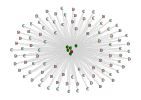

In [15]:
using Colors
function zeromean(x)
    if length(x) == 0
        return 0.0
    else
        return mean(x)
    end
end

using Plots

function simulateType3Digraph(N, K, numRounds, b, c, w)
    G1 = random_regular_digraph(N, K)
    agentTypes = rand([0,1], N) #CHECK
    agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttach3EAvgedI!(G1,activeNode, agentScores)
        agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)
        
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    theplot = generalStatPlot(G1, agentScores)  
    return theplot, G1, agentScores, agentTypes
end


outplot, outgraph, outAgentScores, outAgentTypes = simulateType3Digraph(100,5,100000,5,1,0.005)
nodeColors = map(x -> x == 1 ? colorant"green" : colorant"red", outAgentTypes)
gplot(outgraph, nodesize = outAgentScores .* 2, nodelabel = map(x -> x==1 ? "C" : "D", outAgentTypes), nodefillc = nodeColors)

# Preferential Model Type 3 (Game payoff = interior value,exterior value is interior value) 

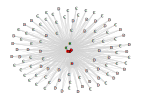

In [80]:
using Colors
using Plots

function simulateType3Digraph(N, K, numRounds, b, c, w)
    G1 = random_regular_digraph(N, K)
    agentTypes = rand([0,1], N) #CHECK
    agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttachEisI!(G1,activeNode, agentScores)
        agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)
        
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    theplot = generalStatPlot(G1, agentScores)  
    return theplot, G1, agentScores, agentTypes
end


outplot, outgraph, outAgentScores, outAgentTypes = simulateType3Digraph(100,5,100000,5,1,0.005)
nodeColors = map(x -> x == 1 ? colorant"green" : colorant"red", outAgentTypes)
gplot(outgraph, nodesize = outAgentScores .* 2, nodelabel = map(x -> x==1 ? "C" : "D", outAgentTypes), nodefillc = nodeColors)
# plot(graphPlot)

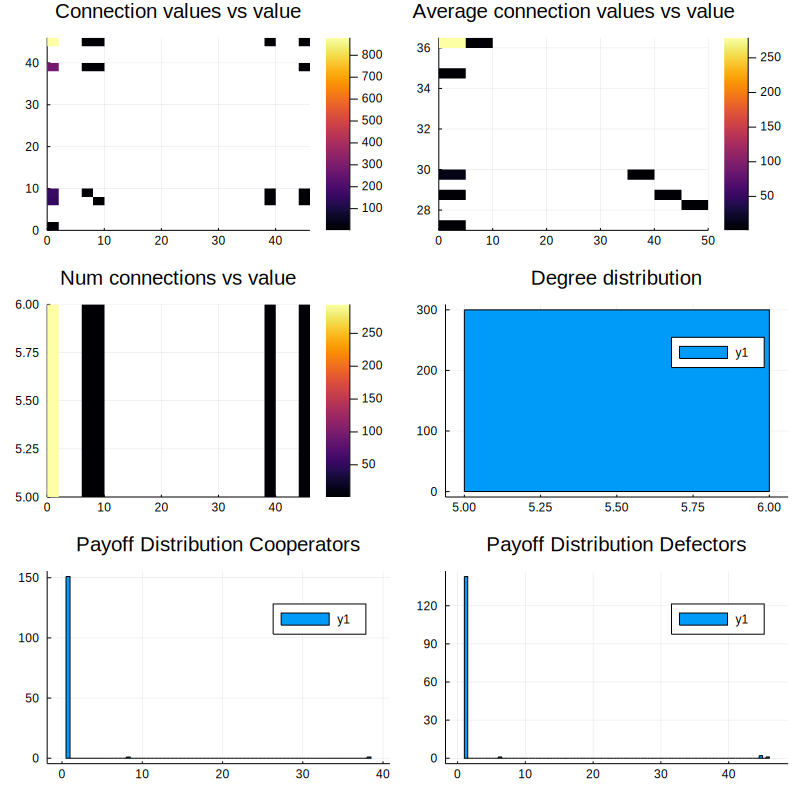

In [56]:
strategicStatPlot(outgraph, outAgentScores, outAgentTypes)
plot!(size=(800,800))

# Model Type 3 With Friends of Best Friends Sampling

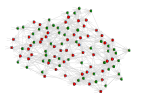

In [51]:
using Colors
using Plots

function simulateType3FriendsDigraph(N, K, numRounds, b, c, w)
    G1 = random_regular_digraph(N, K)
    agentTypes = [i % 2 for i in 1:N] #CHECK
    agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttachFriendValues!(G1,activeNode, agentScores)
        agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)
        
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    theplot = generalStatPlot(G1, agentScores)  
    return theplot, G1, agentScores, agentTypes
end


outplot, outgraph, outAgentScores, outAgentTypes = simulateType3FriendsDigraph(100,5,10000000,5,1,0.01)
nodeColors = map(x -> x == 1 ? colorant"green" : colorant"red", outAgentTypes)
gplot(outgraph, nodesize = outAgentScores .* 2, nodelabel = map(x -> x==1 ? "C" : "D", outAgentTypes), nodefillc = nodeColors)
# plot(graphPlot)
# myplot = strategicStatPlot(outgraph,outAgentScores, outAgentTypes)
# plot(myplot)

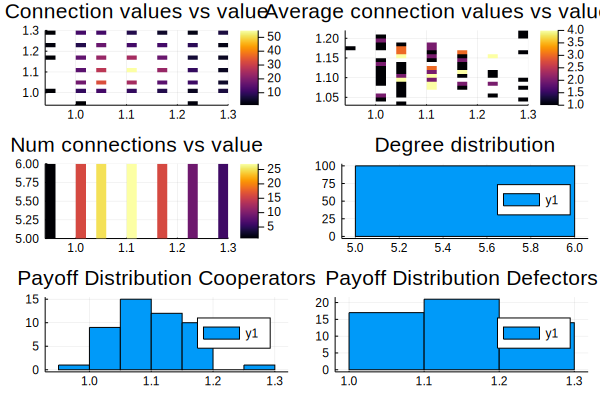

In [26]:
myplot = strategicStatPlot(outgraph,outAgentScores, outAgentTypes)
plot(myplot)

In [49]:
strategyPreferences(outgraph, outAgentScores, outAgentTypes)

Cooperators connect to on average 2.76 cooperators
Defectors connect to on average 2.1 cooperators


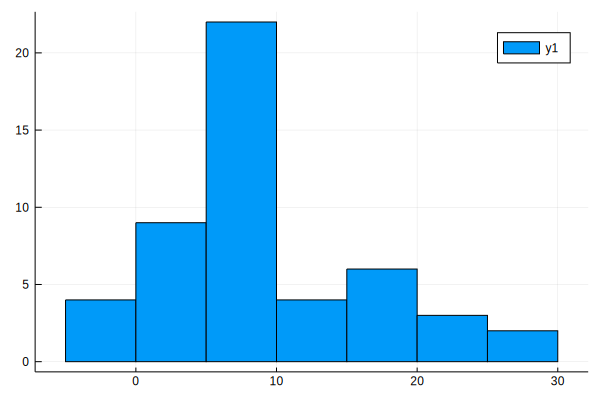

In [67]:
outAgentPayoffs = generatePayoffFromGraph(outgraph, outAgentTypes, 5, 1, 0.01)
cooperatorPayoffs = [outAgentPayoffs[j] for j in 1:100 if outAgentTypes[j] == 1]
histogram(cooperatorPayoffs)

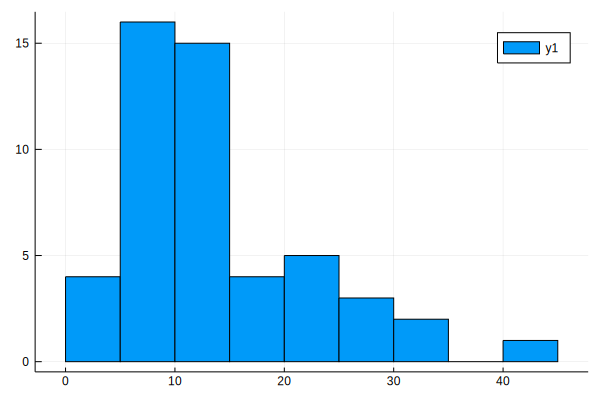

In [68]:
defectorPayoffs = [outAgentPayoffs[j] for j in 1:100 if outAgentTypes[j] == 0]
histogram(defectorPayoffs)

In [69]:
mean(cooperatorPayoffs)

8.54

In [70]:
mean(defectorPayoffs)

11.3

In [50]:
cmean = mean([outAgentScores[j] for j in 1:length(outAgentScores) if outAgentTypes[j]==1])
dmean = mean([outAgentScores[j] for j in 1:length(outAgentScores) if outAgentTypes[j]==0])
println("Cooperator mean payoff is $cmean")
println("Defector mean payoff is $dmean")

Cooperator mean payoff is 1.0955622722427376
Defector mean payoff is 1.12121051026502


# Model Type 3 Friends of Best Friend with Repeat Moves

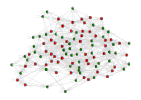

In [56]:
using Colors
using Plots

function simulateType3FriendsDigraph(N, K, numRounds, b, c, w, repeatMoves)
    G1 = random_regular_digraph(N, K)
    agentTypes = [i % 2 for i in 1:N] #CHECK
    agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        for j in 1:repeatMoves
            prefAttachFriendValues!(G1,activeNode, agentScores)
            agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)
        end
        
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    theplot = generalStatPlot(G1, agentScores)  
    return theplot, G1, agentScores, agentTypes
end


outplot, outgraph, outAgentScores, outAgentTypes = simulateType3FriendsDigraph(100,5,10000000,5,1,0.01, 5)
nodeColors = map(x -> x == 1 ? colorant"green" : colorant"red", outAgentTypes)
gplot(outgraph, nodesize = outAgentScores .* 2, nodelabel = map(x -> x==1 ? "C" : "D", outAgentTypes), nodefillc = nodeColors)
# plot(graphPlot)
# myplot = strategicStatPlot(outgraph,outAgentScores, outAgentTypes)
# plot(myplot)

In [57]:
strategyPreferences(outgraph, outAgentScores, outAgentTypes)

Cooperators connect to on average 2.78 cooperators
Defectors connect to on average 2.44 cooperators


In [58]:
cmean = mean([outAgentScores[j] for j in 1:length(outAgentScores) if outAgentTypes[j]==1])
dmean = mean([outAgentScores[j] for j in 1:length(outAgentScores) if outAgentTypes[j]==0])
println("Cooperator mean payoff is $cmean")
println("Defector mean payoff is $dmean")

Cooperator mean payoff is 1.0964695493048868
Defector mean payoff is 1.1202783815340156


# Model Type 3 Friends of Best Friend Sampling Heterogeneous Degree

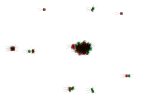

In [62]:
using Colors
using Plots

function simulateType3FriendsDigraph(N, K, numRounds, b, c, w)
    G1 = erdos_renyi(N, K * N, is_directed = true)
    agentTypes = [i % 2 for i in 1:N] #CHECK
    agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttachFriendValues!(G1,activeNode, agentScores)
        agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)
        
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    theplot = generalStatPlot(G1, agentScores)  
    return theplot, G1, agentScores, agentTypes
end


outplot, outgraph, outAgentScores, outAgentTypes = simulateType3FriendsDigraph(100,5,10000000,5,1,0.01)
nodeColors = map(x -> x == 1 ? colorant"green" : colorant"red", outAgentTypes)
gplot(outgraph, nodesize = outAgentScores .* 2, nodelabel = map(x -> x==1 ? "C" : "D", outAgentTypes), nodefillc = nodeColors)
# plot(graphPlot)
# myplot = strategicStatPlot(outgraph,outAgentScores, outAgentTypes)
# plot(myplot)

In [63]:
strategyPreferences(outgraph, outAgentScores, outAgentTypes)

Cooperators connect to on average 2.7 cooperators
Defectors connect to on average 2.24 cooperators


In [64]:
cmean = mean([outAgentScores[j] for j in 1:length(outAgentScores) if outAgentTypes[j]==1])
dmean = mean([outAgentScores[j] for j in 1:length(outAgentScores) if outAgentTypes[j]==0])
println("Cooperator mean payoff is $cmean")
println("Defector mean payoff is $dmean")

Cooperator mean payoff is 1.0920377439950897
Defector mean payoff is 1.1239174127544316


In [7]:
import Pkg; Pkg.add("Colors")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %.9 %Fetching: [=======>                                 ]  16.5 %>                            ]  28.9 %Fetching: [===============>                         ]  36.9 %>                    ]  49.3 % [=========================>               ]  61.7 %.7 %         ]  77.2 % [====================================>    ]  89.7 % Resolving package versions...
 Installed MacroTools ──── v0.5.5
 Installed Inflate ─────── v0.1.2
 Installed Blosc ───────── v0.6.0
 Installed Parsers ─────── v1.0.0
 Installed PlotUtils ───── v0.6.4
 Installed Contour ─────── v0.5.2
 Installed LLVM ────────── v1.3.4
 Installed GeometryTypes ─ v0.7.10
 Installed LaTeXStrings ── v1.1.0
 Installed PlotThemes ──── v1.0.2
 Installed Polynomials ─── v0.6.1
 Installed FileIO ──────── v1.2.4
  Updating `~/.julia/environments/v1.1/Project.toml`

# Introduction Undirected Trust Preference Model, Pop. Unif. Drop

In [227]:
@everywhere function generateFitnessFromGraphNonRival(G, types, b, c, w)
    payoffs = [0 for i in 1:nv(G)]
    for v in vertices(G)
        for j in inneighbors(G,v)
            payoffs[v] += b * types[j]
        end
        payoffs[v] -= c * types[v]
    end
    
    fitnesses = [exp(w * p) for p in payoffs]
    return fitnesses  
end

function generateFitnessFromGraphDivisible(G, types, b, c, w)
    payoffs = [0.0 for i in 1:nv(G)]
    for v in vertices(G)
        for j in inneighbors(G,v)
            if (types[j] == 1)
                payoffs[v] += b / (degree(G,j) * 1.0)
            end
        end
        if degree(G,v) > 0
            payoffs[v] -= c * types[v]
        end
    end
    
    fitnesses = [exp(w * p) for p in payoffs]
    return fitnesses  
end

generateFitnessFromGraphDivisible (generic function with 1 method)

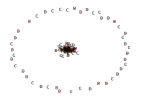

In [185]:
function simulateIntroduction(N, K, numRounds, b, c, w, mutationRate)
    G1 = random_regular_graph(N,K)
    agentTypes = [i % 2 for i in 1:N] #CHECK
    agentScores = generateFitnessFromGraph(G1, agentTypes, b, c, w)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        introNode = rand(1:N,1)[1]
        candidates = neighbors(G1,introNode)
        nCandidates = length(candidates)
        if (nCandidates > 0)
            toIntroduce  = sample(candidates, AnalyticWeights([1 for j in 1:nCandidates]),2)
            a = toIntroduce[1]
            c = toIntroduce[2]
            introFitness = agentScores[introNode]
            aAvgFitness = mean([agentScores[j] for j in neighbors(G1,a)])
            cAvgFitness = mean([agentScores[j] for j in neighbors(G1,c)])
            pConnect = (introFitness ^ 2) / (aAvgFitness * cAvgFitness)
            if (rand() < pConnect) && (!has_edge(G1,a,c)) 
                toRemove = collect(edges(G1))[rand(1:ne(G1))]
                rem_edge!(G1, toRemove)
                add_edge!(G1, a, c)
            end
            agentScores = generateFitnessFromGraphNonRival(G1, agentTypes, b, c, w)  
        end
        if rand() < mutationRate
            toCreate  = sample(1:N, AnalyticWeights([1 for j in 1:N]),2)
            toDestroy = collect(edges(G1))[rand(1:ne(G1))]
            if !has_edge(G1, toCreate[1], toCreate[2])
                add_edge!(G1,toCreate[1],toCreate[2])
                rem_edge!(G1,toDestroy)
            end
        end

    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    theplot = generalStatPlot(G1, agentScores)  
    return theplot, G1, agentScores, agentTypes
end

outplot, outgraph, outAgentScores, outAgentTypes = simulateIntroduction(100,5,1000000,10,1,0.01,0.01)
nodeColors = map(x -> x == 1 ? colorant"green" : colorant"red", outAgentTypes)
gplot(outgraph, nodesize = outAgentScores .* 2, nodelabel = map(x -> x==1 ? "C" : "D", outAgentTypes), nodefillc = nodeColors)
# plot(graphPlot)
# myplot = strategicStatPlot(outgraph,outAgentScores, outAgentTypes)
# plot(myplot)

In [65]:
strategyPreferences(outgraph, outAgentScores, outAgentTypes)
coopAvgDegree = mean([degree(outgraph,v) for v in 1:nv(outgraph) if outAgentTypes[v]==1])
defectAvgDegree = mean([degree(outgraph,v) for v in 1:nv(outgraph) if outAgentTypes[v]==0])
println("Cooperators have average degree $coopAvgDegree")
println("Defectors have average degree $defectAvgDegree")

Cooperators connect to on average 2.8 cooperators
Defectors connect to on average 2.32 cooperators
Cooperators have average degree 5.12
Defectors have average degree 4.16


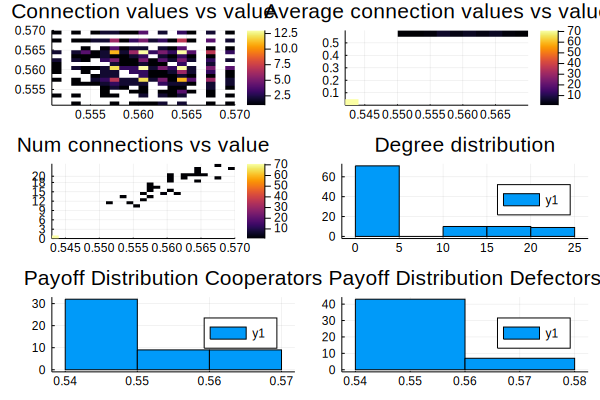

In [44]:
myplot = strategicStatPlot(outgraph,outAgentScores, outAgentTypes)
plot(myplot)

In [66]:
cmean = mean([outAgentScores[j] for j in 1:length(outAgentScores) if outAgentTypes[j]==1])
dmean = mean([outAgentScores[j] for j in 1:length(outAgentScores) if outAgentTypes[j]==0])
println("Cooperator mean payoff is $cmean")
println("Defector mean payoff is $dmean")

Cooperator mean payoff is 1.1441349511782881
Defector mean payoff is 1.1133526617003338


In [17]:
ne(outgraph)

250

In [35]:
outdegree(outgraph,100)

16

In [223]:
@everywhere function meanFitnessesCD(agentScores, types)\
    coopmean = mean([agentScores[j] for j in 1:length(agentScores) if types[j]==1])
    defmean = mean([agentScores[j] for j in 1:length(agentScores) if types[j]==0])
    return coopmean, defmean
end

In [222]:
@everywhere function averageDegreesCD(graph, types)
    coopAvgDegree = mean([degree(graph,v) for v in 1:nv(graph) if types[v]==1])
    defectAvgDegree = mean([degree(graph,v) for v in 1:nv(graph) if types[v]==0])
    return coopAvgDegree, defectAvgDegree
end

In [225]:
@everywhere function modifyScoresInplace!(agentScores, addEdge, remEdge, types,w)
    agentScores[addEdge[1]] = agentScores[addEdge[1]] * exp(w * types[addEdge[2]])
    agentScores[addEdge[2]] = agentScores[addEdge[2]] * exp(w * types[addEdge[1]])
    
    agentScores[remEdge[1]] = agentScores[remEdge[1]] / exp(w * types[remEdge[2]])
    agentScores[remEdge[2]] = agentScores[remEdge[2]] / exp(w * types[remEdge[1]])
end

    

In [226]:
@everywhere function sigma(x)
    return 1 / (1 + exp(-x))
end

@everywhere function randVert(G)
    return ceil(Int, rand()*nv(G))
end

@everywhere function randEdge(G)
    return collect(edges(G))[ceil(Int, rand()*ne(G))]
end

@everywhere function sample2(l,n)
    first = ceil(Int, rand() * n)
    secondOff = ceil(Int,rand() * (n-1))
    second = first + secondOff
    if second > n
        second = second - n
    end
    return l[first],l[second]
end

@everywhere function simulateIntroductionAveragescores(N, K, numRounds, b, c, w, mutationRate; averagePeriod = 0.1, coopProp = 0.5)
    G1 = random_regular_graph(N,K)
    agentTypes = [0 for i in 1:N] #CHECK
    for i in 1:floor(Int,coopProp * N)
        agentTypes[i] = 1
    end
    agentScores = generateFitnessFromGraphNonRival(G1, agentTypes, b, c, w)
    
    averageFitnesses = [0.0 for i in 1:N]

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        introNode = randVert(G1)
        candidates = neighbors(G1,introNode)
        nCandidates = length(candidates)
        if (nCandidates >= 2)
            a,c  = sample2(candidates,nCandidates)
            if (!has_edge(G1,a,c))
                introFitness = agentScores[introNode]
                aAvgFitness = mean([agentScores[j] for j in neighbors(G1,a)])
                cAvgFitness = mean([agentScores[j] for j in neighbors(G1,c)])
                pConnect = sigma(introFitness / aAvgFitness) * sigma(introFitness / cAvgFitness)
                if (rand() < pConnect) && (!has_edge(G1,a,c)) 
                    toRemove = randEdge(G1)
                    rem_edge!(G1, toRemove)
                    add_edge!(G1, a, c)
#                     agentScores = generateFitnessFromGraphNonRival(G1, agentTypes, b, c, w)
                    modifyScoresInplace!(agentScores,(a,c), (src(toRemove),dst(toRemove)),agentTypes,w)
                end
#                 modifyScoresInplace!(agentScores,(a,c), toRemove,agentTypes,w)
            end
        end
        if rand() < mutationRate
            toCreate  = sample(1:N, AnalyticWeights([1 for j in 1:N]),2)
            toDestroy = randEdge(G1)
            if !has_edge(G1, toCreate[1], toCreate[2])
                add_edge!(G1,toCreate[1],toCreate[2])
                rem_edge!(G1,toDestroy)
                agentScores = generateFitnessFromGraphNonRival(G1,agentTypes,b,c,w)
            end
        end
        if (n > numRounds * (1-averagePeriod))
            averageFitnesses += agentScores / (numRounds * averagePeriod)
        end

    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
#     theplot = generalStatPlot(G1, agentScores)  
    return G1, averageFitnesses, agentTypes
end

In [212]:
using Profile

@time simulateIntroductionAveragescores(100,5,1000000, 5,1,0.01,0.01)

  1.176418 seconds (13.57 M allocations: 1.213 GiB, 22.63% gc time)


({100, 250} undirected simple Int64 graph, [0.826537, 0.681872, 0.825316, 0.895967, 0.791487, 0.856647, 0.668472, 0.710756, 0.745217, 0.786135  …  1.20606, 1.3449, 1.1567, 1.08325, 1.3525, 1.08389, 1.06495, 1.02699, 1.09239, 1.12459], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

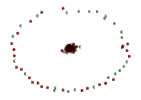

In [249]:
@everywhere function simulateIntroductionAveragedViews(N, K, numRounds, b, c, w, mutationRate; averagePeriod = 0.1, coopProp = 0.5)
    G1 = random_regular_graph(N,K)
    agentTypes = [0 for i in 1:N] #CHECK
    for i in 1:floor(Int,coopProp * N)
        agentTypes[i] = 1
    end
    agentScores = generateFitnessFromGraphNonRival(G1, agentTypes, b, c, w)
    
    averageFitnesses = [0.0 for i in 1:N]

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        introNode = randVert(G1)
        candidates = neighbors(G1,introNode)
        nCandidates = length(candidates)
        if (nCandidates >= 2)
            a,c  = sample2(candidates,nCandidates)
            if (!has_edge(G1,a,c))
#                 introFitness = mean([agentScores[j] for j in neighbors(G1,introNode)])
                introFitness = agentScores[introNode]
                aAvgFitness = mean([agentScores[j] for j in neighbors(G1,a)])
                cAvgFitness = mean([agentScores[j] for j in neighbors(G1,c)])
                pConnect = (introFitness / aAvgFitness) * (introFitness / cAvgFitness)
                if (rand() < pConnect) && (!has_edge(G1,a,c)) 
                    toRemove = randEdge(G1)
                    rem_edge!(G1, toRemove)
                    add_edge!(G1, a, c)
#                     agentScores = generateFitnessFromGraphNonRival(G1, agentTypes, b, c, w)
                    modifyScoresInplace!(agentScores,(a,c), (src(toRemove),dst(toRemove)),agentTypes,w)
                end
#                 modifyScoresInplace!(agentScores,(a,c), toRemove,agentTypes,w)
            end
        end
        if rand() < mutationRate
            toCreate  = sample(1:N, AnalyticWeights([1 for j in 1:N]),2)
            toDestroy = randEdge(G1)
            if !has_edge(G1, toCreate[1], toCreate[2])
                add_edge!(G1,toCreate[1],toCreate[2])
                rem_edge!(G1,toDestroy)
                agentScores = generateFitnessFromGraphNonRival(G1,agentTypes,b,c,w)
            end
        end
        if (n > numRounds * (1-averagePeriod))
            averageFitnesses += agentScores / (numRounds * averagePeriod)
        end

    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
#     theplot = generalStatPlot(G1, agentScores)  
    return G1, averageFitnesses, agentTypes
end

outGraph, outFits,outTypes = simulateIntroductionAveragedViews(100,5,1000000, 5,0,0.01,0.01)

# toRemove = [i for i in 1:nv(outGraph) if degree(outGraph,i) == 0]
# for i in toRemove
#     rem_vertex!(outGraph,i)
# end

nodeColors = map(x -> x == 1 ? colorant"green" : colorant"red", outTypes)
gplot(outGraph, nodesize = outFits .* 2, nodelabel = map(x -> x==1 ? "C" : "D", outTypes), nodefillc = nodeColors)

In [161]:
Profile.print(format=:flat)

 Count File                        Line Function                               
     3 ./In[131]                      2 #simulateIntroductionAveragescores#6...
    79 ./In[131]                     13 #simulateIntroductionAveragescores#6...
     3 ./In[131]                     14 #simulateIntroductionAveragescores#6...
     3 ./In[131]                     15 #simulateIntroductionAveragescores#6...
     1 ./In[131]                     16 #simulateIntroductionAveragescores#6...
   165 ./In[131]                     17 #simulateIntroductionAveragescores#6...
    24 ./In[131]                     20 #simulateIntroductionAveragescores#6...
   354 ./In[131]                     21 #simulateIntroductionAveragescores#6...
   347 ./In[131]                     22 #simulateIntroductionAveragescores#6...
    55 ./In[131]                     23 #simulateIntroductionAveragescores#6...
    32 ./In[131]                     24 #simulateIntroductionAveragescores#6...
   374 ./In[131]                     25 

  3334 ./essentials.jl              742 #invokelatest#1                        
  3334 ./essentials.jl              741 invokelatest                           
     9 ./essentials.jl              381 reinterpret                            
    50 ./float.jl                   399 *                                      
     4 ./float.jl                   395 +                                      
   158 ./float.jl                   397 -                                      
    76 ./float.jl                   401 /                                      
     3 ./float.jl                   452 <                                      
     3 ./float.jl                   487 <                                      
     8 ./float.jl                   488 <                                      
     1 ./float.jl                   497 <                                      
     5 ./float.jl                   448 ==                                     
     4 ./float.jl                    60 

    22 ...eGraphs/SimpleGraphs.jl    75 add_edge!                              
     1 ...eGraphs/SimpleGraphs.jl    60 edges                                  
    25 ...eGraphs/SimpleGraphs.jl    64 fadj                                   
    22 ...eGraphs/SimpleGraphs.jl    77 inneighbors                            
     3 ...eGraphs/SimpleGraphs.jl    78 outneighbors                           
     2 ...enerators/randgraphs.jl   696 #random_regular_graph#28(::Int64, ::...
     1 ...enerators/randgraphs.jl   703 #random_regular_graph#28(::Int64, ::...
     2 ...enerators/randgraphs.jl   284 _try_creation                          
     1 ...enerators/randgraphs.jl   300 _try_creation(::Int64, ::Array{Int64...
     1 ...enerators/randgraphs.jl   302 _try_creation(::Int64, ::Array{Int64...
     3 ...enerators/randgraphs.jl   685 random_regular_graph                   
     3 ...pleGraphs/simpleedge.jl     7 Type                                   
     2 ...raphs/simpleedgeiter.jl    25 

In [251]:
using SharedArrays
using Distributed
@everywhere using LightGraphs
@everywhere using StatsBase
function segregationDistributionAveraged(simulator, N, K, numRoundsPer, b, c, w, mutationRate;  numTrials = 30, coopPropRange = [0.5])
    resultsArray = []
    for coopP in coopPropRange
        results = SharedArray{Tuple{Float64,Float64}}(numTrials)
        @sync @distributed for n = 1:numTrials
            outgraph, outAgentScores, outAgentTypes = simulator(N,K,numRoundsPer,b,c,w,mutationRate, coopProp=coopP)
            coopConnects, defConnects = strategyPreferences(outgraph, outAgentScores, outAgentTypes)
            coopAvgDegeee, defAvgDegree = averageDegreesCD(outgraph, outAgentTypes)
            coopPreference = coopConnects / coopAvgDegree
            defPreference = 1 - (defConnects / defAvgDegree) # going for same type preference
            u = coopPreference * coopP + defPreference * (1-coopP)

            coopFit, defFit = meanFitnessesCD(outAgentScores, outAgentTypes)
            f = coopFit / defFit

            results[n] = (f,u)
        end
        push!(resultsArray, sdata(results))
    end
    return resultsArray
end


# coopRangeVals = [i * 0.01 for i in 1:99]
# coopRangeTrials2 = segregationDistributionAveraged(simulateIntroductionAveragescores, 100, 5, 1000000, 5, 1, 0.01, 0.01,
#                                             numTrials = 200, coopPropRange = coopRangeVals)
addprocs(4 -nprocs())
println(nprocs())
@time retrialAvgViews = segregationDistributionAveraged(simulateIntroductionAveragedViews, 100, 5, 1000000, 5.0, 0.0, 0.01, 0.01,
                                            numTrials = 50)

# function trialPlot(trial)
#     return scatter([x[1] for x in trial], [x[2] for x in trial])
# end

# plot(trialPlot(bigTrial))

        
    
    

4
 87.314524 seconds (290.76 k allocations: 14.642 MiB, 0.48% gc time)


1-element Array{Any,1}:
 Tuple{Float64,Float64}[(0.691397, 0.490829), (0.683237, 0.497514), (0.654876, 0.460503), (0.70419, 0.523542), (0.675174, 0.599003), (0.664985, 0.500919), (0.660998, 0.543628), (0.660783, 0.544722), (0.668183, 0.586293), (0.695793, 0.555304)  …  (0.711213, 0.547043), (0.682778, 0.469866), (0.665161, 0.556676), (0.669915, 0.479848), (0.697546, 0.514378), (0.700414, 0.492811), (0.670164, 0.52968), (0.674611, 0.488821), (0.692214, 0.519445), (0.672274, 0.489277)]

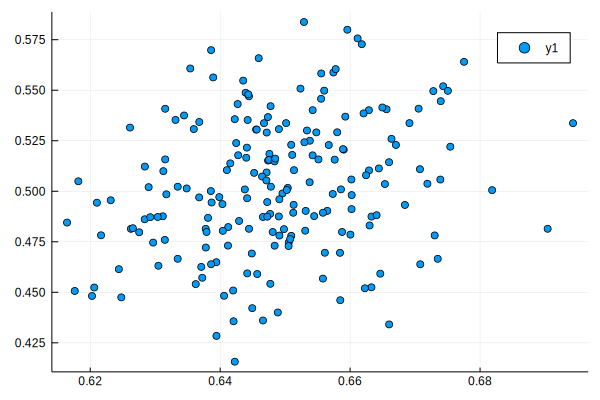

In [239]:
scatter([x[1] for x in retrialAvgViews[1]], [x[2] for x in retrialAvgViews[1]])
# length([x[1] for x in retrialAvgViews[1] if x[1] > 1.0]) / length(retrialAvgViews[1])

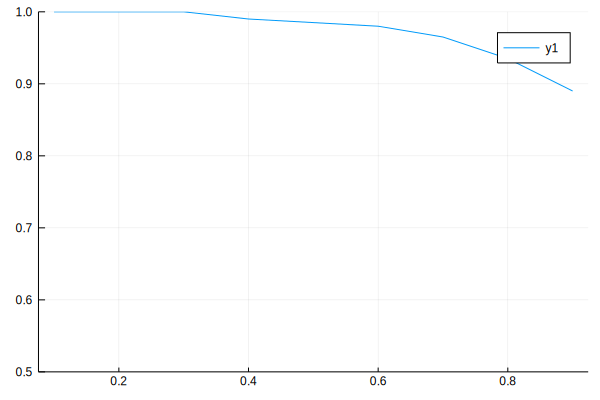

In [155]:
coopAvgWins = [length(collect(x[1] for x in coopRangeTrials[i] if x[1] > 1.0))/200.0 for i in 1:9]
plot(coopRangeVals, coopAvgWins, ylims = (0.5,1))

In [158]:
initialSeg5050trials = segregationDistributionAveraged(simulateIntroductionAveragescores, 100, 5, 1, 5, 1, 0.01, 0.01,
                                            numTrials = 2000)
histogram([x[1] for x in initialSeg5050trials[1]])
mean([x[1] for x in initialSeg5050trials[1]])

0.9977132757269954

In [113]:
res = bigTrial

200-element Array{Any,1}:
 (1.0754611001502585, 0.5772310323383084)
 (1.0225565410133546, 0.5199415703781513)
 (1.0198632213374017, 0.5165624999999999)
 (1.036094883241719, 0.5171066810344827) 
 (1.0082501816912874, 0.515625)          
 (0.9752635953147376, 0.4643028846153846)
 (1.0303710569463191, 0.517578125)       
 (0.9878018776773316, 0.4768393208661417)
 (1.0564013932916527, 0.5551615594660194)
 (1.0213528585237852, 0.4989629424778761)
 (1.0686298077250604, 0.5656821646341463)
 (1.030548905852813, 0.5102562650966184) 
 (1.0352159662039153, 0.5477843496963564)
 ⋮                                       
 (1.0560403509551104, 0.5573401162790698)
 (1.0815924233426015, 0.5533161569148937)
 (0.9989611330004857, 0.478075731981982) 
 (1.0530387764504998, 0.537657789408867) 
 (1.1236805596875918, 0.6000270243710691)
 (0.9792077492558454, 0.4714133522727273)
 (1.0385939546918654, 0.5095987751256281)
 (1.0916435339649833, 0.596387214467005) 
 (1.0221676027104865, 0.52708548553719)  
 (0.9984

In [115]:
length([x for x in res if x[1]>1.0]) /2

77.5

In [118]:
floor(0.5)

0.0

In [123]:
[i for i in 0:10]

11-element Array{Int64,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [130]:
1:floor(Int,2.0)

1:2